In [1]:
# import thư viện
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

items = pd.read_excel('/content/drive/MyDrive/DA Customers, Transactions & Website Traffic/customers (UK).xlsx' , sheet_name='Items')
items

,ItemID,Product,Brand,SellPrice,CostPrice
0,1,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943,359
1,2,070ttream0.518887735674677,GO4582ey<S!+k1VE,717,207
2,3,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739,199
3,4,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532,262
4,5,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593,392
...,...,...,...,...,...
17884,17885,zarzmodel0.705343660670698,"Zah<@kD,N[_x007f_Vo]vf",202,42
17885,17886,zelQailer0.599088919243258,Nia_TfHUVDtT>6-s,463,131
17886,17887,zenyation0.980382120595891,Chbm3nL;wgcU<S(y,688,200
17887,17888,zenvition0.646980947183814,"Ac8IJsKH,4xtY.Tk",157,63


In [4]:
#đọc bảng pageview
pageview = pd.read_excel('/content/drive/MyDrive/DA Customers, Transactions & Website Traffic/datatask2mindx.xlsx' , sheet_name='Sheet1')
pageview

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669,5778,6286,"Ki)D3jDmA,RIP68X",2020-01-10
1,/2020/1/070ttream0.518887735674677,360,370,403,GO4582ey<S!+k1VE,2020-01-10
2,/2020/1/070htream0.333307794468401,588,614,658,G.Kb^jz*soY!(-4Q,2020-01-16
3,/2020/1/100Grseys0.271522111052549,1284,1309,1385,Dr|vm[-5p~56Y\mk,2020-01-17
4,/2020/1/100[nside0.645837365801341,1846,1881,2025,Dr|vm[-5p~56Y\mk,2020-01-23
...,...,...,...,...,...,...
17884,/2020/12/yinfbowls0.6558670149224,130,133,142,HoXbja)_x007f_qT:ESE8#,2020-12-01
17885,/2020/12/yosolease0.0455049365834417,315,326,365,"YoRQW7@*&5W+~4Y""",2020-12-03
17886,/2020/12/you^-info0.127669879156147,1420,1448,1616,"MouDd/fn,XEARhBp",2020-12-06
17887,/2020/12/youe-info0.729842478879044,484,488,510,"yo4}AUKGso=,?!DX",2020-12-04


In [5]:
customer = pd.read_excel('/content/drive/MyDrive/DA Customers, Transactions & Website Traffic/customers (UK).xlsx' , sheet_name='customer info')
customer

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N
...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,2016-09-05,F,1989-10-25,N
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,2016-09-05,NaN,1965-07-25,Y
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,2016-09-05,M,1980-11-07,Y
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,2016-09-05,M,1980-09-17,Y


In [6]:
transaction = pd.read_excel('/content/drive/MyDrive/DA Customers, Transactions & Website Traffic/datatask2mindx.xlsx' , sheet_name='Sheet4')
transaction

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0,0,352,2020-03-21,In Store
1,0,0,3433,2020-07-14,In Store
2,0,0,11162,2020-08-09,In Store
3,0,0,13011,2020-12-07,In Store
4,0,0,13885,2020-11-08,In Store
...,...,...,...,...,...
25208,8361,769,10053,2020-12-19,In Store
25209,8361,769,13162,2020-02-04,In Store
25210,8362,769,8727,2020-11-18,In Store
25211,8362,769,13065,2020-05-11,In Store


# câu a: Website traffic có ảnh hưởng đến doanh thu không ?




Ở câu này, chúng em sẽ xét trend 2 giá trị pageview và sell price.

In [7]:
pageview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17889 entries, 0 to 17888
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Page URL                17889 non-null  object        
 1   users                   17889 non-null  int64         
 2   uniquePageviews         17889 non-null  int64         
 3   pageviews               17889 non-null  int64         
 4   Brand                   17889 non-null  object        
 5   Posted On (DD/MM/YYYY)  17889 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 838.7+ KB


In [8]:
# Chuyển đổi cột "date" sang kiểu datetime
pageview['Posted On (DD/MM/YYYY)'] = pd.to_datetime(pageview['Posted On (DD/MM/YYYY)'])

# Sử dụng phương thức dt để truy cập phương thức isocalendar() (tính số thứ tự tuần của ngày đó)
pageview['col1'] = pageview['Posted On (DD/MM/YYYY)'].dt.isocalendar().week


In [9]:
#group by ngày để tính
sum_pageview_day = pageview.groupby(by='Posted On (DD/MM/YYYY)',as_index=False)['pageviews'].sum()
sum_pageview_week = pageview.groupby(by='col1',as_index=False)['pageviews'].sum()

In [10]:
sum_pageview_day.head()

,Posted On (DD/MM/YYYY),pageviews
0,2020-01-01,70355
1,2020-01-02,122559
2,2020-01-03,71055
3,2020-01-04,15352
4,2020-01-05,51435


In [11]:
sum_pageview_week.head()

,col1,pageviews
0,1,330756
1,2,599439
2,3,649960
3,4,714915
4,5,454759


In [12]:
sum_pageview_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   col1       50 non-null     UInt32
 1   pageviews  50 non-null     int64 
dtypes: UInt32(1), int64(1)
memory usage: 778.0 bytes


In [13]:
sum_pageview_week.col1=sum_pageview_week.col1.astype('object')

Ở câu này, chúng em sẽ xét trend 2 giá trị pageview và sell price.

In [14]:
# thực hiện merge 2 bảng transaction và items để tính được mỗi item ID có sell price bao nhiêu?
tran_mer_items = transaction.merge(items, on='ItemID')

In [15]:
# Sử dụng phương thức dt để truy cập phương thức isocalendar()
tran_mer_items['col1'] = tran_mer_items['TransactionDate'].dt.isocalendar().week


In [16]:
# group by để tính tổng 1 ngày có doanh thu bao nhiêu?
sum_SellPrice_day=tran_mer_items.groupby(by='TransactionDate',as_index=False)['SellPrice'].sum()
# group by để tính tổng có doanh thu theo tuần bao nhiêu?
sum_SellPrice_week=tran_mer_items.groupby(by='col1',as_index=False)['SellPrice'].sum()

In [17]:
sum_SellPrice_day.head()

,TransactionDate,SellPrice
0,2020-01-01,55864
1,2020-01-02,55681
2,2020-01-03,67753
3,2020-01-04,64573
4,2020-01-05,61098


In [18]:
sum_SellPrice_week.head()

,col1,SellPrice
0,1,304969
1,2,403671
2,3,438182
3,4,443455
4,5,194077


In [19]:
sum_pageview_day.shape

(343, 2)

In [20]:
sum_SellPrice_day.shape

(324, 2)

In [21]:
joined_df = pd.merge(sum_pageview_day, sum_SellPrice_day, left_on='Posted On (DD/MM/YYYY)', right_on='TransactionDate', how='inner')
joined_df.head(4)

,Posted On (DD/MM/YYYY),pageviews,TransactionDate,SellPrice
0,2020-01-01,70355,2020-01-01,55864
1,2020-01-02,122559,2020-01-02,55681
2,2020-01-03,71055,2020-01-03,67753
3,2020-01-04,15352,2020-01-04,64573


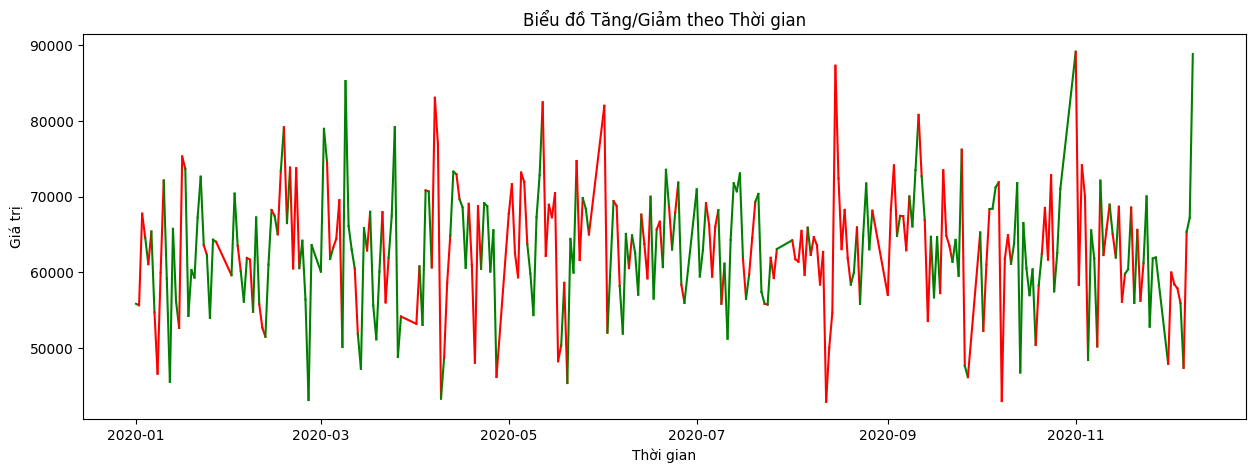

In [22]:

# Tạo đối tượng hình ảnh mới và thiết lập kích thước
fig = plt.figure(figsize=(15, 5))

# Dữ liệu thời gian và giá trị tăng/giảm
time = np.array(joined_df['Posted On (DD/MM/YYYY)'])
values1 =  np.array(joined_df['pageviews'])
values2 =  np.array(joined_df['SellPrice'])


# Tạo một mảng nhị phân biểu thị tăng (1) hoặc giảm (0)
changes1 = np.sign(np.diff(values1))
changes1 = np.insert(changes1, 0, 0)

changes2 = np.sign(np.diff(values2))
changes2 = np.insert(changes2, 0, 0)

changes = changes1*changes2

# Tạo một mảng màu sắc tương ứng với đồng biến (xanh) hoặc nghịch biến (đỏ)
colors = ['red' if change < 0 else 'green' for change in changes]

# Vẽ biểu đồ đường và thiết lập màu sắc tương ứng
for i in range(len(time) - 1):
    plt.plot([time[i], time[i + 1]], [values2[i], values2[i + 1]], color=colors[i])

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Biểu đồ Tăng/Giảm theo Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')

# Hiển thị biểu đồ
plt.show()

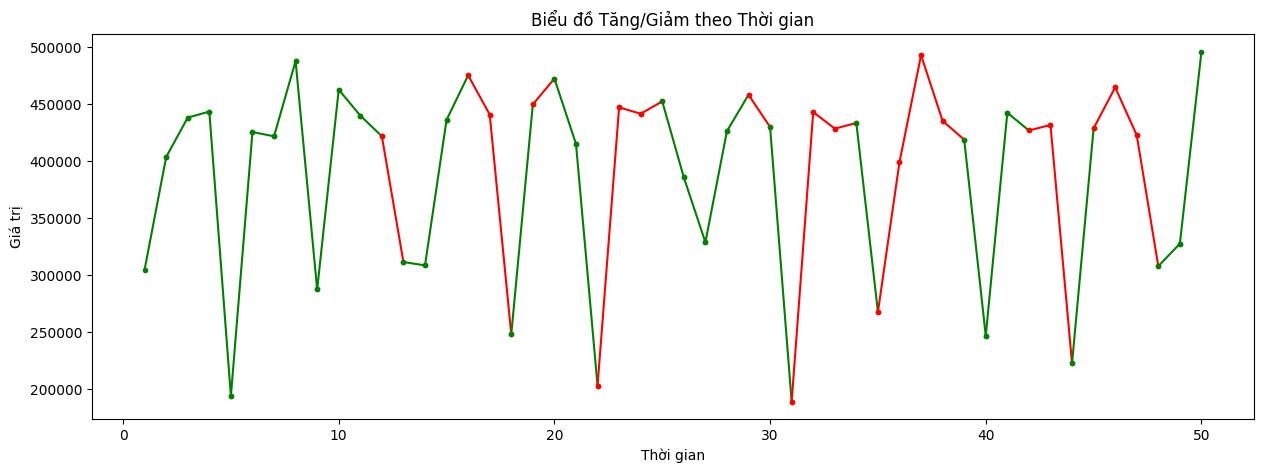

In [23]:
joined_df_week = pd.merge(sum_pageview_week, sum_SellPrice_week, left_on='col1', right_on='col1', how='inner')
# Tạo đối tượng hình ảnh mới và thiết lập kích thước
fig = plt.figure(figsize=(15, 5))

# Dữ liệu thời gian và giá trị tăng/giảm
time = np.array(joined_df_week['col1'])
values1 =  np.array(joined_df_week['pageviews'])
values2 =  np.array(joined_df_week['SellPrice'])


# Tạo một mảng nhị phân biểu thị tăng (>0) hoặc giảm (<0)
changes1 = np.sign(np.diff(values1))
changes1 = np.insert(changes1, 0, 0)

changes2 = np.sign(np.diff(values2))
changes2 = np.insert(changes2, 0, 0)

changes = changes1*changes2

# Tạo một mảng màu sắc tương ứng với đồng biến (xanh) hoặc nghịch biến (đỏ)
colors = ['red' if change < 0 else 'green' for change in changes]

# Vẽ biểu đồ đường và thiết lập màu sắc tương ứng
for i in range(len(time) - 1):
    plt.plot([time[i], time[i + 1]], [values2[i], values2[i + 1]], color=colors[i], marker='.')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Biểu đồ Tăng/Giảm theo Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')

# Hiển thị biểu đồ
plt.show()


Từ biều đồ trên ta có nhận xét như sau:
1. Pageview có ảnh hưởng đến sellprice khá lớn trong 1 đơn vị thời gian nhất định sự biên thiên của pageview và sellprice đa số đều cùng chiều biến đổi
2. Pageview không tác động đến sellprice ngay lật tức mà có thời gian trễ
vậy nên đơn vị thời gian theo tuần sẽ cho đồng biến nhiều hơn. Điều này được lý giải là do có nhiều đơn vị khách hàng không phải truy cập wed là họ mua luôn. Mà họ truy cập nhiều lần sau 1 thời gian họ mới đưa ra quyết định.

## Để chắc chắn hơn, ta sẽ tính hệ số tương quan giữa doanh thu và pageview

In [24]:
pageview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17889 entries, 0 to 17888
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Page URL                17889 non-null  object        
 1   users                   17889 non-null  int64         
 2   uniquePageviews         17889 non-null  int64         
 3   pageviews               17889 non-null  int64         
 4   Brand                   17889 non-null  object        
 5   Posted On (DD/MM/YYYY)  17889 non-null  datetime64[ns]
 6   col1                    17889 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), int64(3), object(2)
memory usage: 926.0+ KB


In [25]:
pageview.describe()

,users,uniquePageviews,pageviews,col1
count,17889.000000,17889.000000,17889.000000,17889.0
mean,1395.492929,1434.260104,1592.937224,24.777349
std,3352.453401,3490.932957,4412.134945,13.930845
min,0.000000,0.000000,0.000000,1.0
25%,329.000000,335.000000,359.000000,13.0
50%,624.000000,636.000000,684.000000,25.0
75%,1351.000000,1387.000000,1500.000000,37.0
max,215223.000000,221108.000000,232177.000000,50.0


In [26]:
groupby_brand_pageview=pageview.groupby(by='Brand',as_index=False)['pageviews'].sum()
groupby_brand_customer=items.groupby(by='Brand',as_index=False)['SellPrice'].sum()
groupby_brand_customer = groupby_brand_pageview.merge(items, on='Brand')

In [27]:
groupby_brand_customer

,Brand,pageviews,ItemID,Product,SellPrice,CostPrice
0,!lMifo~0~N65rM}2,102,12886,skyK-date0.237469692167954,905,433
1,#B_-`aDe`}CVt'!A,57719,1737,affOlease0.639774265568529,1126,273
2,#B_-`aDe`}CVt'!A,57719,3081,vauK-info0.958920102803307,339,213
3,#B_-`aDe`}CVt'!A,57719,10470,how[-safe0.151301895990878,913,47
4,#B_-`aDe`}CVt'!A,57719,11491,18-`lease0.952310074301681,478,285
...,...,...,...,...,...,...
17884,"ze\yQP9Ju,s(O|>]",366,13161,zelKvideo0.979832131901721,1377,380
17885,Ét2:1))2]qB2`9;^,1914,2079,etujation0.0817298363167827,1233,363
17886,Ét2:1))2]qB2`9;^,1914,16747,etua-baby0.472156023137423,524,378
17887,Ét2:1))2]qB2`9;^,1914,16748,etuqt-day0.117221119496646,1167,321


In [28]:
groupby_brand_merge=groupby_brand_customer.groupby(by='Brand',as_index=False)[['ItemID','SellPrice','pageviews']].sum()
groupby_brand_merge

,Brand,ItemID,SellPrice,pageviews
0,!lMifo~0~N65rM}2,12886,905,102
1,#B_-`aDe`}CVt'!A,1025550,59603,4790677
2,#F5)UtM8Y&|njdBq,6912,514,470
3,$UYTzcYl\*I(\/SZ,11152,636,1602
4,"(Ah/=SM""p^hD')i?",14863,990,509
...,...,...,...,...
3237,wicqp`l8l$:_x007f_^}e:,26214,1388,182
3238,"yo4}AUKGso=,?!DX",117682,11082,296715
3239,"ze\yQP9Ju,s(O|>]",54580,5286,2196
3240,Ét2:1))2]qB2`9;^,35574,2924,5742


In [29]:
groupby_brand_merge.corr()

<ipython-input-29-c91901854604>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  groupby_brand_merge.corr()


,ItemID,SellPrice,pageviews
ItemID,1.000000,0.996454,0.802882
SellPrice,0.996454,1.000000,0.820657
pageviews,0.802882,0.820657,1.000000


In [30]:
pageview.corr()

<ipython-input-30-0c49fa3e2c9a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pageview.corr()


,users,uniquePageviews,pageviews,col1
users,1.000000,0.998199,0.952604,-0.015809
uniquePageviews,0.998199,1.000000,0.961924,-0.015081
pageviews,0.952604,0.961924,1.000000,-0.007119
col1,-0.015809,-0.015081,-0.007119,1.000000


Ta đã tính được hệ số tương quan giữa pageview và doanh thu là 0.82
Hơn nữa các chỉ số users uniquepageviews cũng tương quan lên đến 0.95
Kết luận webtraffic có liên quan đến doanh thu của cửa hàng.

**->Kết Luận: số lượng truy cập và số lượng người dùng có tương quan tuyến tính tới doanh thu**

câu b: Sản phẩm nào mang lại pageviews và doanh thu

# Câu b

In [31]:
transaction


,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0,0,352,2020-03-21,In Store
1,0,0,3433,2020-07-14,In Store
2,0,0,11162,2020-08-09,In Store
3,0,0,13011,2020-12-07,In Store
4,0,0,13885,2020-11-08,In Store
...,...,...,...,...,...
25208,8361,769,10053,2020-12-19,In Store
25209,8361,769,13162,2020-02-04,In Store
25210,8362,769,8727,2020-11-18,In Store
25211,8362,769,13065,2020-05-11,In Store


In [32]:
items

,ItemID,Product,Brand,SellPrice,CostPrice
0,1,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943,359
1,2,070ttream0.518887735674677,GO4582ey<S!+k1VE,717,207
2,3,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739,199
3,4,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532,262
4,5,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593,392
...,...,...,...,...,...
17884,17885,zarzmodel0.705343660670698,"Zah<@kD,N[_x007f_Vo]vf",202,42
17885,17886,zelQailer0.599088919243258,Nia_TfHUVDtT>6-s,463,131
17886,17887,zenyation0.980382120595891,Chbm3nL;wgcU<S(y,688,200
17887,17888,zenvition0.646980947183814,"Ac8IJsKH,4xtY.Tk",157,63


In [33]:
pageview

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),col1
0,/2020/1/032irview0.686128260621012,5669,5778,6286,"Ki)D3jDmA,RIP68X",2020-01-10,2
1,/2020/1/070ttream0.518887735674677,360,370,403,GO4582ey<S!+k1VE,2020-01-10,2
2,/2020/1/070htream0.333307794468401,588,614,658,G.Kb^jz*soY!(-4Q,2020-01-16,3
3,/2020/1/100Grseys0.271522111052549,1284,1309,1385,Dr|vm[-5p~56Y\mk,2020-01-17,3
4,/2020/1/100[nside0.645837365801341,1846,1881,2025,Dr|vm[-5p~56Y\mk,2020-01-23,4
...,...,...,...,...,...,...,...
17884,/2020/12/yinfbowls0.6558670149224,130,133,142,HoXbja)_x007f_qT:ESE8#,2020-12-01,49
17885,/2020/12/yosolease0.0455049365834417,315,326,365,"YoRQW7@*&5W+~4Y""",2020-12-03,49
17886,/2020/12/you^-info0.127669879156147,1420,1448,1616,"MouDd/fn,XEARhBp",2020-12-06,49
17887,/2020/12/youe-info0.729842478879044,484,488,510,"yo4}AUKGso=,?!DX",2020-12-04,49


In [34]:
pageview['product']=pageview['Page URL'].str.split('/').str[-1]
pageview['product']

0         032irview0.686128260621012
1         070ttream0.518887735674677
2         070htream0.333307794468401
3         100Grseys0.271522111052549
4         100[nside0.645837365801341
                    ...             
17884       yinfbowls0.6558670149224
17885    yosolease0.0455049365834417
17886     you^-info0.127669879156147
17887     youe-info0.729842478879044
17888     zahJuseum0.120647638596675
Name: product, Length: 17889, dtype: object

In [35]:
item_pageview=pd.merge(pageview, items, left_on='product', right_on='Product', how='inner')
tong_pageview = item_pageview.groupby('ItemID')['pageviews'].sum()
top_10_largest = tong_pageview.nlargest(10)
top_10_largest

ItemID
12907    232177
1213     170599
4103     128892
13376    126771
6013     124284
13828    104984
4532     103863
4410     103850
1778      88000
6966      78524
Name: pageviews, dtype: int64

In [36]:
tran_mer_items
tong_sellprice = tran_mer_items.groupby('ItemID')['SellPrice'].sum()
top_10_largest = tong_sellprice.nlargest(10)
top_10_largest

ItemID
7046     11556
5975      9205
193       8428
12326     7980
17874     7794
3345      7686
8000      7552
17736     7520
17526     7518
11959     7422
Name: SellPrice, dtype: int64

# Câu C



### Table customer

In [37]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          770 non-null    int64         
 1   FirstName   770 non-null    object        
 2   LastName    770 non-null    object        
 3   Country     770 non-null    object        
 4   DateJoined  770 non-null    datetime64[ns]
 5   Gender      519 non-null    object        
 6   Birthday    770 non-null    datetime64[ns]
 7   Newsletter  770 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 48.2+ KB


In [38]:
customer['ID'] = customer['ID'].astype('object')

In [39]:
customer.describe()

<ipython-input-39-0c5fd1a9e819>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customer.describe()
<ipython-input-39-0c5fd1a9e819>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customer.describe()


,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
count,770.0,770,770,770,770,519,770,770
unique,770.0,638,491,4,172,2,761,2
top,0.0,Vince0.78241795130866,Tan0.662463855720801,GER - Germany,2016-09-05 00:00:00,F,2001-11-14 00:00:00,Y
freq,1.0,9,35,321,168,262,2,413
first,NaN,NaN,NaN,NaN,2015-03-02 00:00:00,NaN,1965-01-20 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2016-09-15 00:00:00,NaN,2010-12-01 00:00:00,NaN


In [40]:
customer['Gender'] = customer['Gender'].fillna('Not Identify')

In [41]:
customer

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,Not Identify,1968-02-03,N
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N
...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,2016-09-05,F,1989-10-25,N
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,2016-09-05,Not Identify,1965-07-25,Y
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,2016-09-05,M,1980-11-07,Y
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,2016-09-05,M,1980-09-17,Y


###table transaction

In [42]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25213 entries, 0 to 25212
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          25213 non-null  int64         
 1   CustomerID       25213 non-null  int64         
 2   ItemID           25213 non-null  int64         
 3   TransactionDate  25213 non-null  datetime64[ns]
 4   Channel          25213 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 985.0+ KB


In [43]:
transaction['CustomerID'] = transaction['CustomerID'].astype('object')

In [44]:
transaction['ItemID'] = transaction['ItemID'].astype('object')

###table items

In [45]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17889 entries, 0 to 17888
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ItemID     17889 non-null  int64 
 1   Product    17889 non-null  object
 2   Brand      17889 non-null  object
 3   SellPrice  17889 non-null  int64 
 4   CostPrice  17889 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 698.9+ KB


In [46]:
items.describe()

,ItemID,SellPrice,CostPrice
count,17889.000000,17889.000000,17889.000000
mean,8945.000000,808.622673,267.933982
std,5164.253818,349.004316,132.468264
min,1.000000,43.000000,40.000000
25%,4473.000000,525.000000,153.000000
50%,8945.000000,801.000000,267.000000
75%,13417.000000,1103.000000,382.000000
max,17889.000000,1964.000000,500.000000


In [47]:
items['Brand'].duplicated().sum()

14647

### Câu 3: Tính RFM

Ý tưởng ở đây em muốn phân loại khách hàng theo 3 chỉ số:
+ recency : chỉ số thể hiện mức độ gần đây của khách hàng.
+ frequency: chỉ số thể hiện mức độ thường xuyên của khách hàng.
+ monetary: chỉ số thể hiện khối lượng tiêu dùng của khách hàng.

Cách tính:
+ recency = thời gian hiện tại trừ đi thơi gian mua hàng gần nhất của khách hàng.
+ frequency = số lần khách hàng mua hàng
+ monetary = số tiền mua hàng của khách hàng

In [48]:
recency_df = transaction.groupby(by='CustomerID',as_index=False)['TransactionDate'].max()
recency_df.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = recency_df['LastPurchaseDate'].max()
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

recency_df

,CustomerID,LastPurchaseDate,Recency
0,0,2020-12-23,4
1,1,2020-12-15,12
2,2,2020-12-11,16
3,3,2020-12-20,7
4,4,2020-12-22,5
...,...,...,...
765,765,2020-12-05,22
766,766,2020-07-07,173
767,767,2020-12-26,1
768,768,2020-12-27,0


In [49]:
frequency_df = transaction.drop_duplicates().groupby(by=['CustomerID'], as_index=False)['TransactionDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df

,CustomerID,Frequency
0,0,45
1,1,39
2,2,21
3,3,19
4,4,48
...,...,...
765,765,38
766,766,7
767,767,57
768,768,49


In [50]:
monetary = transaction.merge(items, how='left', on='ItemID')
monetary


,OrderID,CustomerID,ItemID,TransactionDate,Channel,Product,Brand,SellPrice,CostPrice
0,0,0,352,2020-03-21,In Store,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
1,0,0,3433,2020-07-14,In Store,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
2,0,0,11162,2020-08-09,In Store,sevCrtage0.255053382396546,Wem+H2Pk8Jfbb*[D,582,391
3,0,0,13011,2020-12-07,In Store,theB-info0.46598133500784,ThcmX`v~{K~t{Jeh,339,135
4,0,0,13885,2020-11-08,In Store,kanyained0.673922507607742,Ka53T<K8f.2M94Yd,1369,231
...,...,...,...,...,...,...,...,...,...
25208,8361,769,10053,2020-12-19,In Store,belUition0.249973899862794,"Ac8IJsKH,4xtY.Tk",1077,242
25209,8361,769,13162,2020-02-04,In Store,zenpkawae0.226346388966917,"Ince!T,;eW/4o\eg",1140,253
25210,8362,769,8727,2020-11-18,In Store,g-snation0.0993461911005428,WaQqK)2JxI(=dac=,205,66
25211,8362,769,13065,2020-05-11,In Store,undflease0.156012002899051,"Uny~Y,~<rTC^J6py",1012,272


In [51]:
monetary_df = monetary.groupby(by='CustomerID',as_index=False)['SellPrice'].sum()
monetary_df

,CustomerID,SellPrice
0,0,32997
1,1,34948
2,2,17879
3,3,14603
4,4,37029
...,...,...
765,765,29538
766,766,5331
767,767,45470
768,768,35462


In [52]:
monetary_df.columns = ['CustomerID', 'Monetary']

monetary_df

,CustomerID,Monetary
0,0,32997
1,1,34948
2,2,17879
3,3,14603
4,4,37029
...,...,...
765,765,29538
766,766,5331
767,767,45470
768,768,35462


In [53]:
rf_df = recency_df.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID')

rfm_df


,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,0,2020-12-23,4,45,32997
1,1,2020-12-15,12,39,34948
2,2,2020-12-11,16,21,17879
3,3,2020-12-20,7,19,14603
4,4,2020-12-22,5,48,37029
...,...,...,...,...,...
765,765,2020-12-05,22,38,29538
766,766,2020-07-07,173,7,5331
767,767,2020-12-26,1,57,45470
768,768,2020-12-27,0,49,35462


Vì cả 3 chỉ số trên đều khác đơn vị đo lên chuẩn hoá nó bằng cách tính thứ hạng của nó, rồi chia phân trăm cho thứ hạng cao nhất. Chỉ số này em gọi là rank normal

In [54]:
rfm_df['R_rank'] = rf_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rf_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank','M_rank'], inplace=True)

rfm_df

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0,2020-12-23,4,45,32997,69.684499,73.181818,73.181818
1,1,2020-12-15,12,39,34948,36.831276,62.012987,62.012987
2,2,2020-12-11,16,21,17879,27.091907,28.831169,28.831169
3,3,2020-12-20,7,19,14603,55.349794,24.805195,24.805195
4,4,2020-12-22,5,48,37029,63.923182,79.025974,79.025974
...,...,...,...,...,...,...,...,...
765,765,2020-12-05,22,38,29538,18.175583,59.675325,59.675325
766,766,2020-07-07,173,7,5331,0.548697,4.935065,4.935065
767,767,2020-12-26,1,57,45470,90.397805,92.337662,92.337662
768,768,2020-12-27,0,49,35462,100.000000,80.649351,80.649351


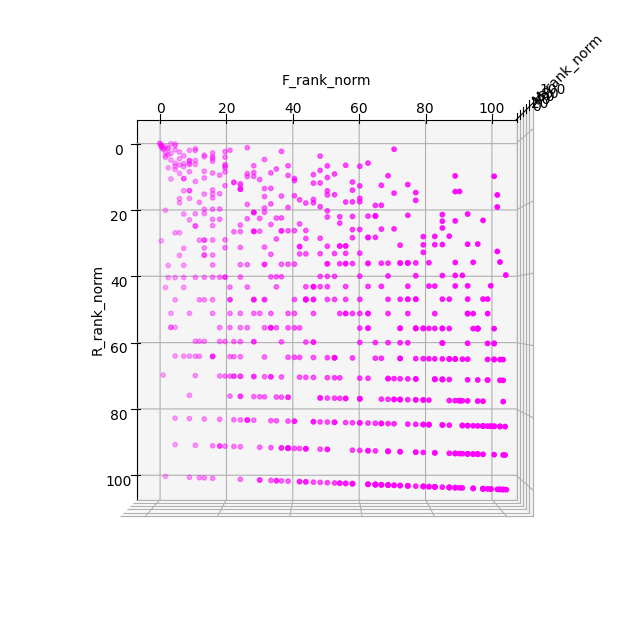

In [55]:

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x = rfm_df['R_rank_norm']
y = rfm_df['F_rank_norm']
z = rfm_df['M_rank_norm']

ax.scatter(x, y, z, c='magenta' ,s=10)

ax.set_xlabel('R_rank_norm')
ax.set_ylabel('F_rank_norm')
ax.set_zlabel('M_rank_norm')

ax.view_init(elev=90, azim=0)

plt.show()


## K-mean

In [56]:
data=rfm_df[['R_rank_norm','F_rank_norm','M_rank_norm']]

### tìm số phân lớp hợp lý

tìm điểm elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

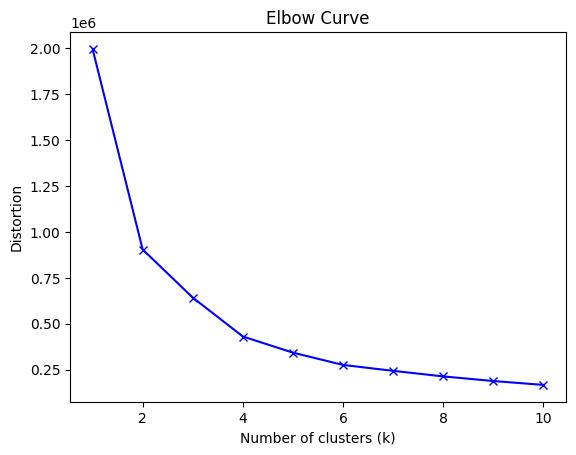

In [57]:
# Define range of k values
k_max=10
k_values = range(1, k_max + 1)

# Run K-means for each k and calculate distortion
distortions = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    distortion = kmeans.inertia_
    distortions.append(distortion)

# Plot elbow curve
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

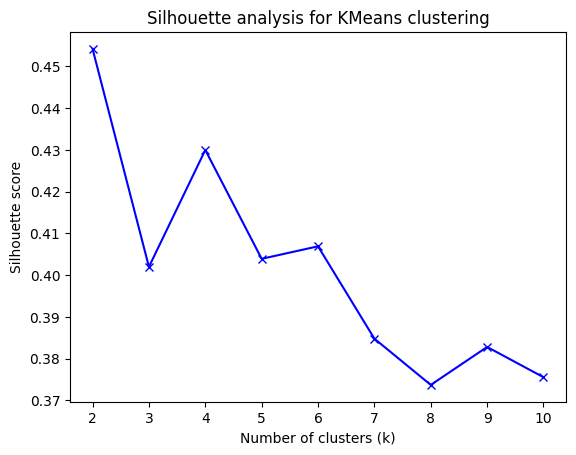

The best number of clusters is: 2


In [58]:
from sklearn.metrics import silhouette_score


# define the range of k values to test
k_max = 10
k_range = range(2, k_max+1)

# calculate the Silhouette score for each k
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

# plot the Silhouette score for each k
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for KMeans clustering')
plt.show()

# find the k with the highest Silhouette score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"The best number of clusters is: {best_k}")

### phân lớp khách hàng

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


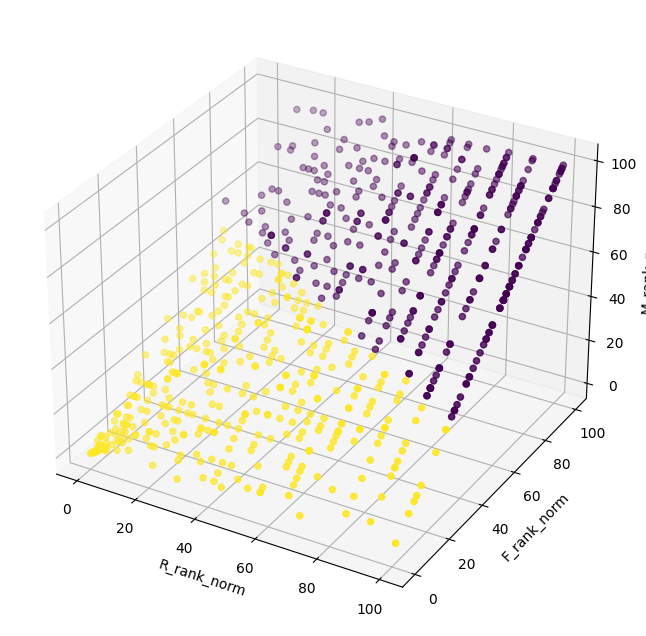

In [59]:

# Initialize K-means with the selected number of clusters
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit K-means to the data
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters in 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x = data['R_rank_norm']
y = data['F_rank_norm']
z = data['M_rank_norm']

ax.scatter(x, y, z, c=labels, cmap='viridis', s=20)

ax.set_xlabel('R_rank_norm')
ax.set_ylabel('F_rank_norm')
ax.set_zlabel('M_rank_norm')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


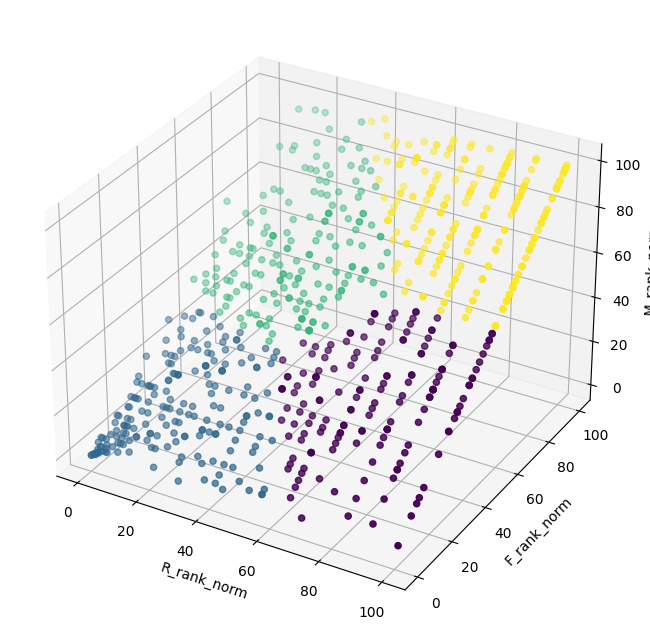

In [60]:
# Initialize K-means with the selected number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit K-means to the data
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters in 3D plot
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

x = data['R_rank_norm']
y = data['F_rank_norm']
z = data['M_rank_norm']

ax.scatter(x, y, z, c=labels, cmap='viridis', s=20)

ax.set_xlabel('R_rank_norm')
ax.set_ylabel('F_rank_norm')
ax.set_zlabel('M_rank_norm')

plt.show()

Sau khi phân khúc ta được 4 tệp khách hàng:

Loại 1: là nhóm màu xanh lục trên hình nhóm này là tệp khách hàng đã từng mua hàng và không quay lại nên hệ số thường xuyên, hệ số gần đây và hệ số tiếu dùng đều thấp. Khá khó khăn để tận dụng đc tập khách hàng này.

Loại 2: là nhóm khách hàng màu tím là tệp khách hàng mới nên hệ số gần đây tốt còn hai hệ số còn lại chưa cao lắm. Đây là tệp khách hàng rất đáng để quan tâm tới nên áp dụng những chương trình cho khách hàng mới để giữ chân và chuyển họ thành khách hàng thân thiết.

Loại 3: là nhóm khách hàng màu vàng với cả 3 chỉ số đều cao đây là nhóm khách hàng rất thân quen, dễ tiếp cận, dễ giữ chân nhưng không thể vì thế mà lơ là nhóm khách hàng này vì đây là nhóm mang lại doanh thu lớn nhất. Vậy nên vẫn cần nhưng chương trình chăm sóc thúc đẩy bán hàng cho nhóm khách hàng.

Loại 4: là nhóm khách hàng đã từng thân thiết. Họ có chỉ số tiêu dùng cao, chỉ số thường xuyên tốt nhưng đã lâu chưa quay lại. Đây là tệp khách hàng nên nhắm tới nhiều nhất để đưa họ quay lại với chúng ta.